In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
lab_enc=LabelEncoder( )

In [7]:
columns_to_encode = ['OverTime', 'Over18', 'MaritalStatus','JobRole','Gender','EducationField','Department','BusinessTravel','Attrition']

for column in columns_to_encode:
    data[column] = lab_enc.fit_transform(data[column])

print(data)

      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationF

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

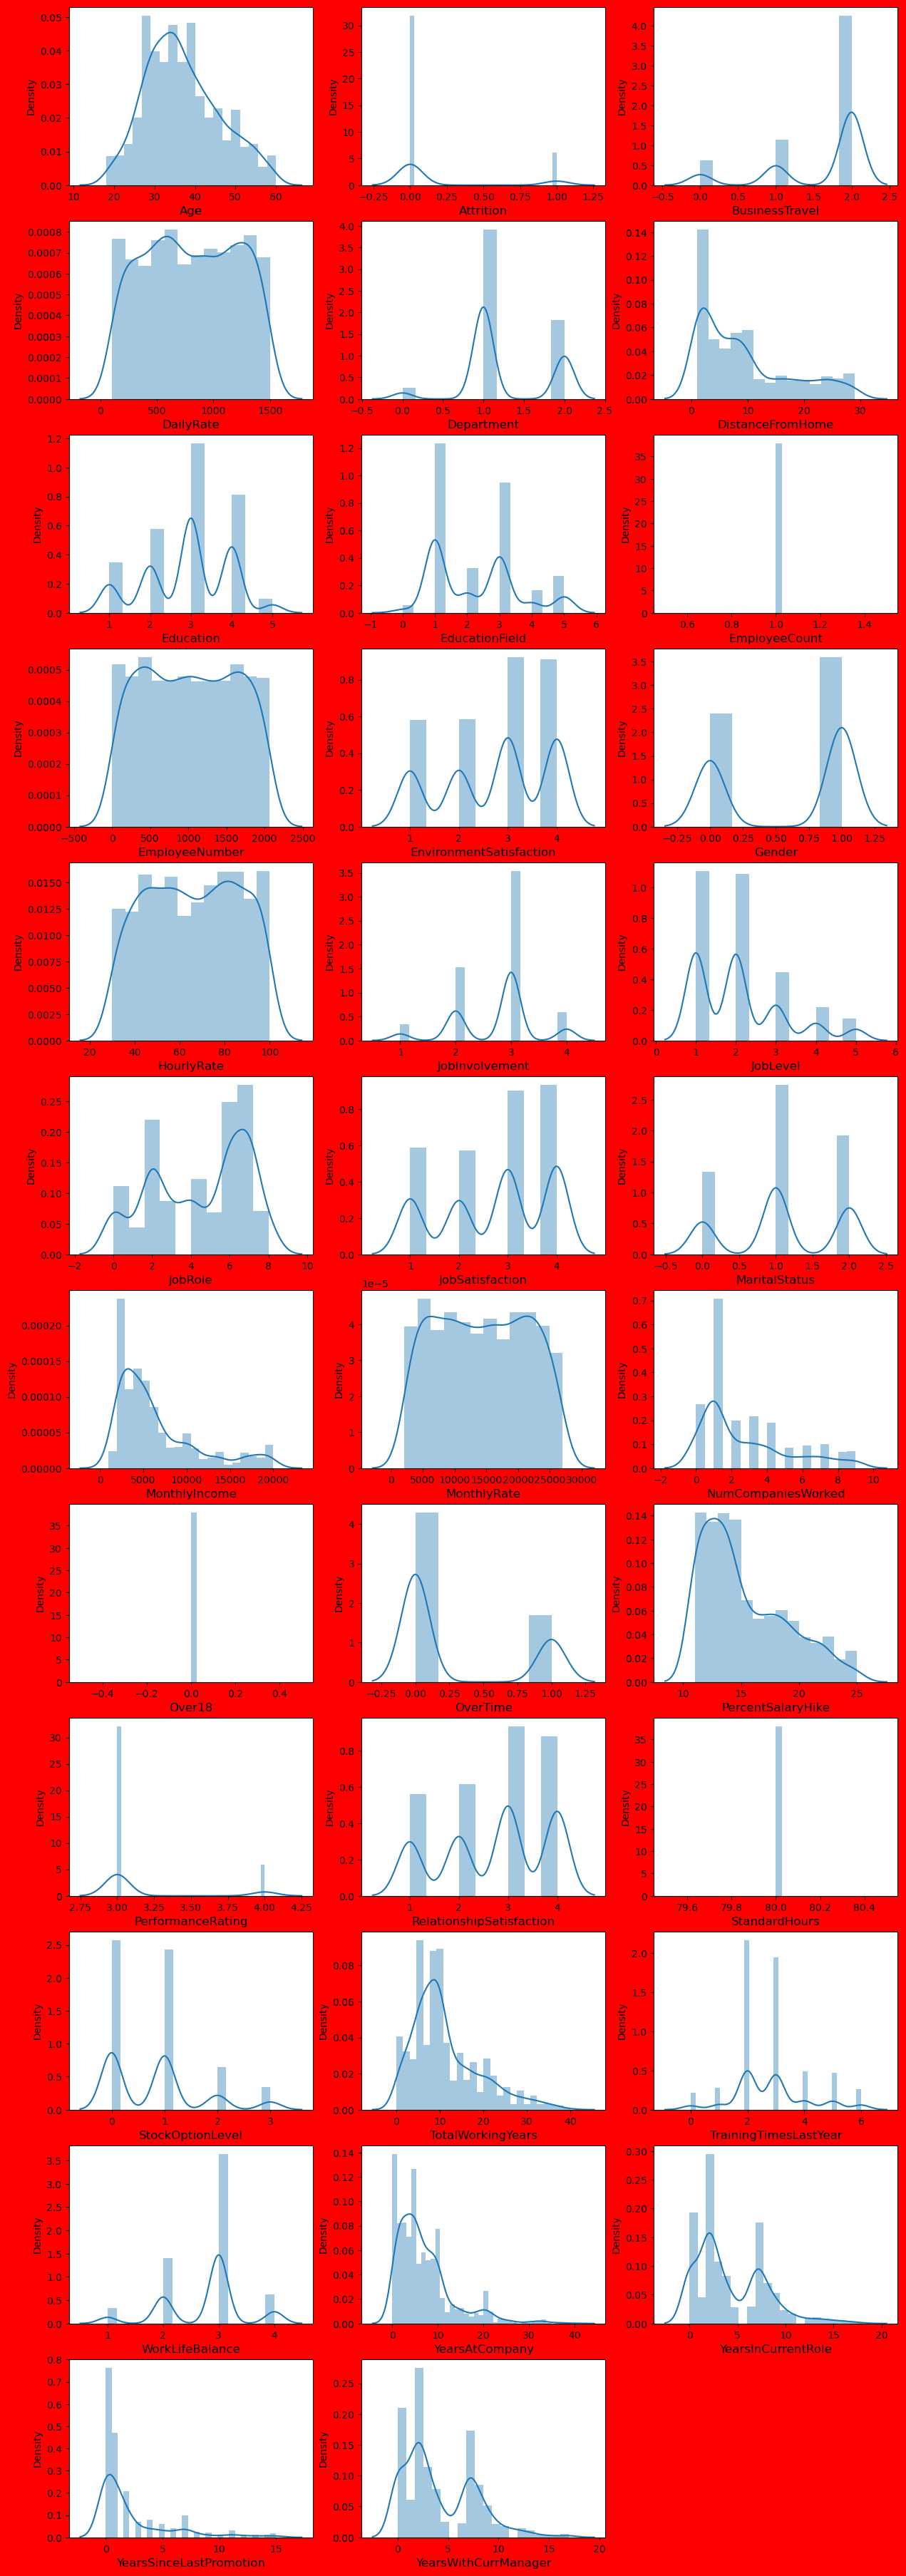

In [10]:
plt.figure(figsize=(15,50), facecolor='red')
plotnumber=1
for column in data:
      if plotnumber<=36:
            plt.subplot(13,3,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column, fontsize=12)
            plotnumber+=1
plt.show( )

In [11]:
# Now features such as ,'DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany'
# are to be treated for outliers using IQR

q1 = data['DistanceFromHome'].quantile(0.25)
q3 = data['DistanceFromHome'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['DistanceFromHome'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )  

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1466,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1467,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1468,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [12]:
q1 = data['MonthlyIncome'].quantile(0.25)
q3 = data['MonthlyIncome'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['MonthlyIncome'] > DFH)
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )  

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1352,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1353,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1354,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [13]:
q1 = data['PercentSalaryHike'].quantile(0.25)
q3 = data['PercentSalaryHike'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['PercentSalaryHike'] > DFH)
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )  

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1352,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1353,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1354,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [14]:
q1 = data['TotalWorkingYears'].quantile(0.25)
q3 = data['TotalWorkingYears'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['TotalWorkingYears'] > DFH)
data=data.drop(data.index[np_index])
data.shape
data.reset_index( ) 

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1291,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1292,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1293,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [15]:
q1 = data['YearsAtCompany'].quantile(0.25)
q3 = data['YearsAtCompany'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['YearsAtCompany'] > DFH)
data=data.drop(data.index[np_index])
data.shape
data.reset_index( ) 

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1264,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1265,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1266,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [16]:
data.shape

(1268, 35)

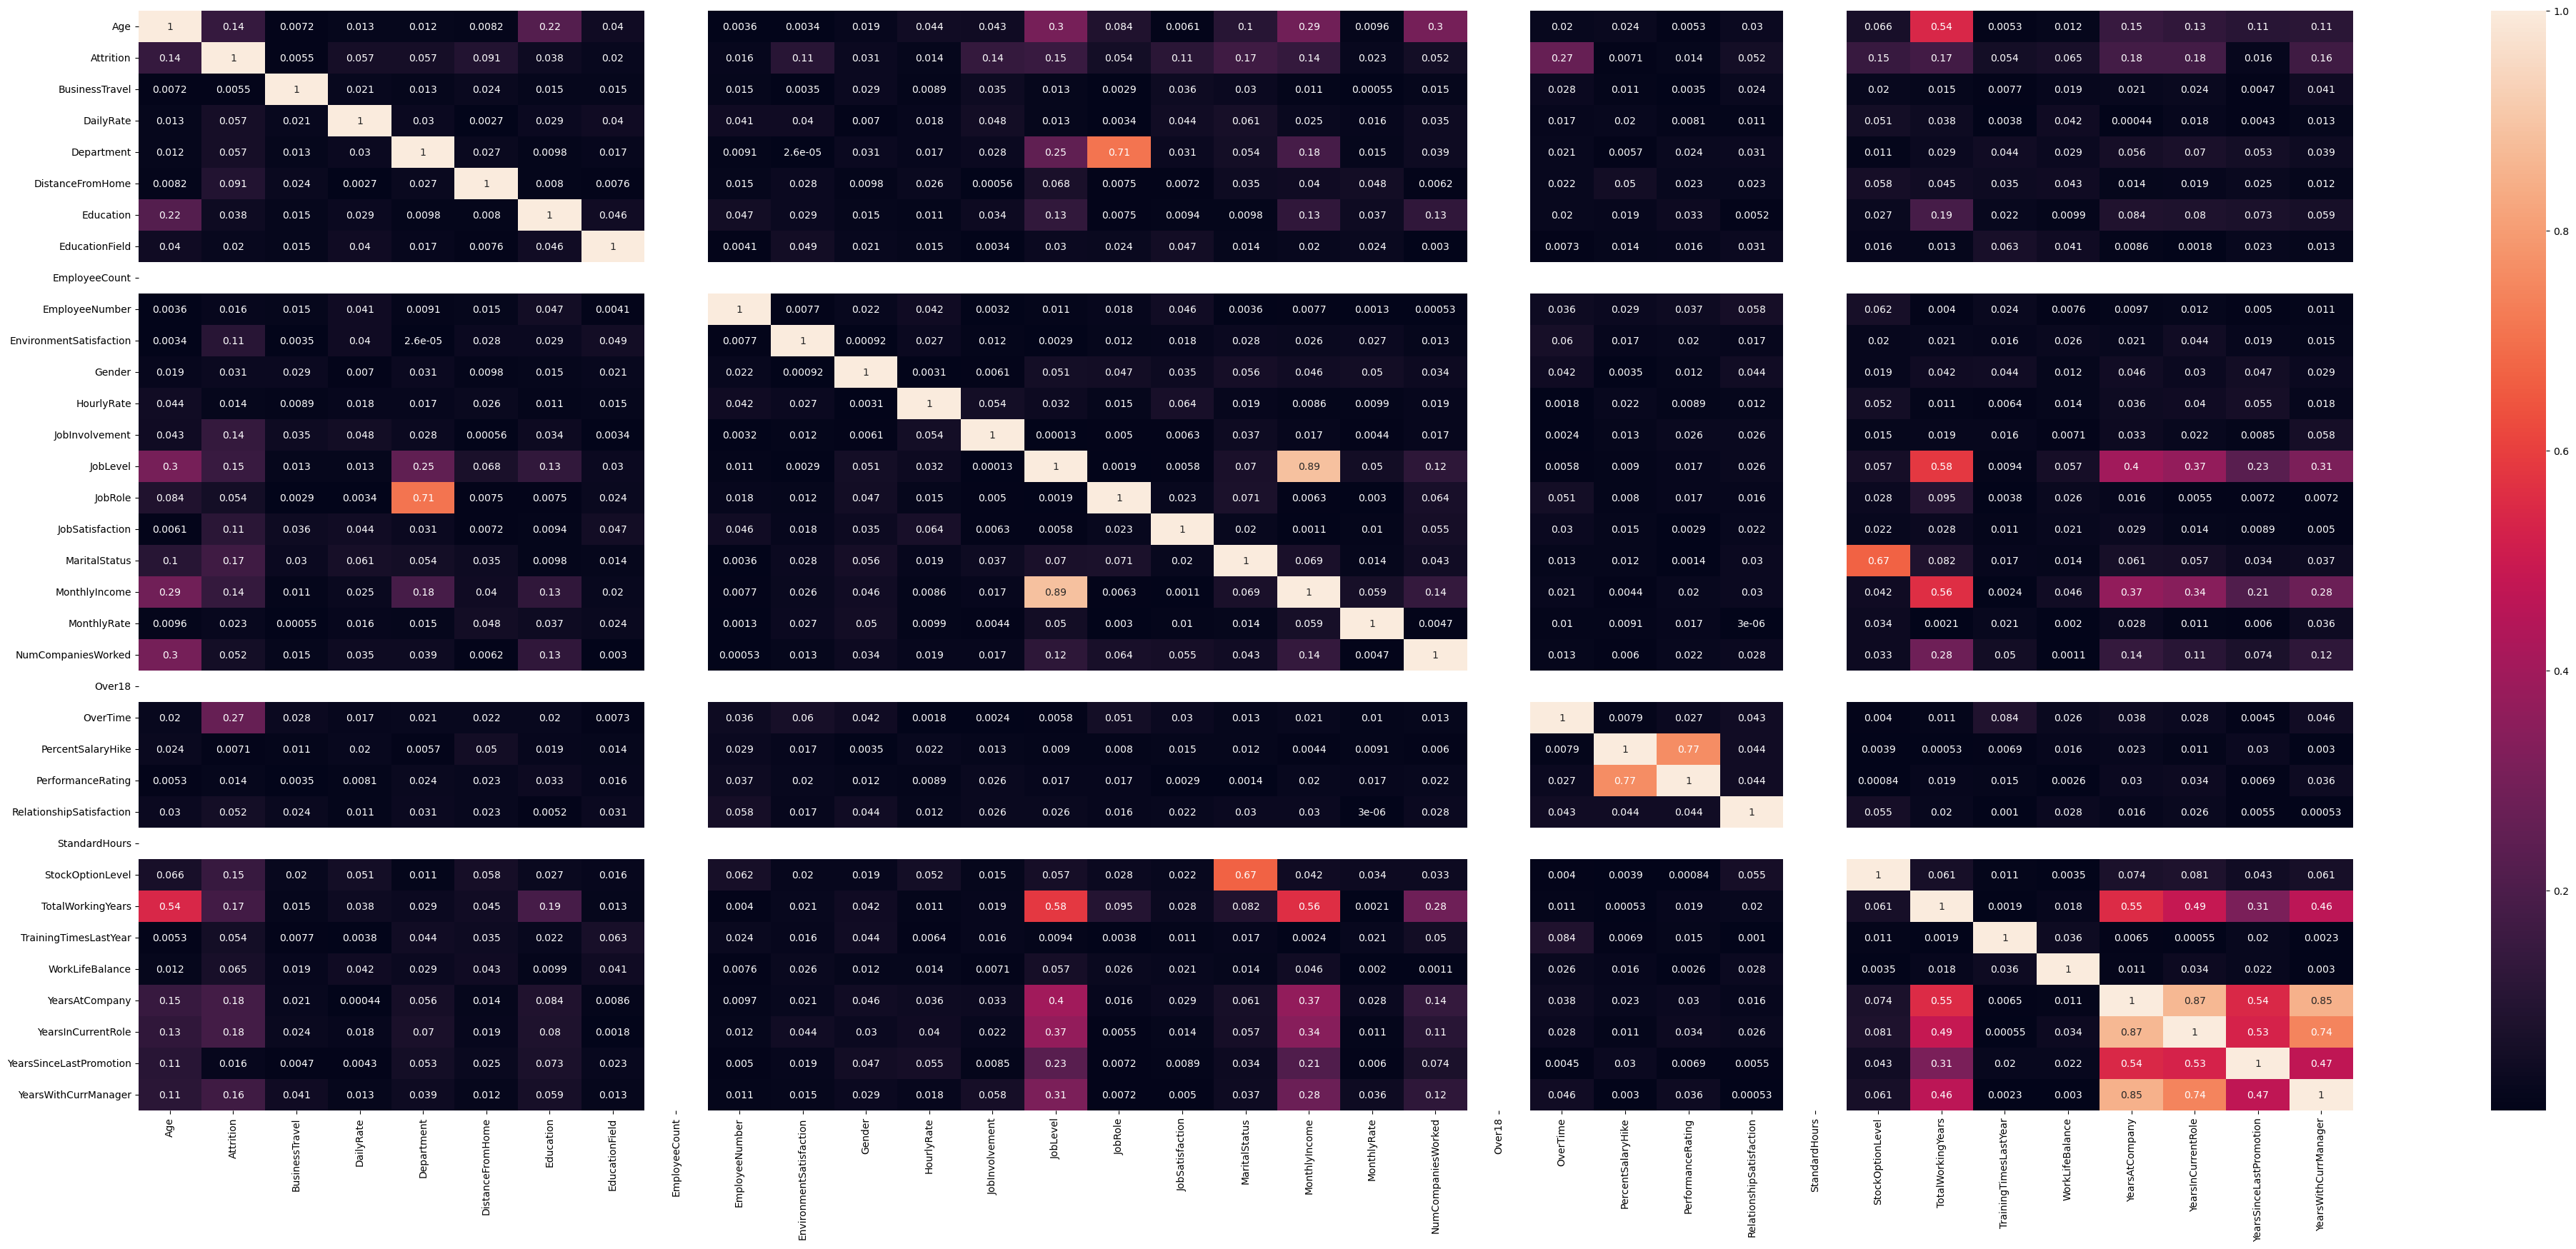

In [17]:
# plotting Heatmap (Correlation matrix) it’s a technique to find relationship strength between features and labels and among labels (multi-collinearity)
# VIF and K_best are also possible methods but most convenient is heatmap because of its color based visulaization
df_corr = data.corr().abs()
plt.figure(figsize=(50, 20))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 10})
plt.show()

In [18]:
# From HeatMap yearsAtCompany and YearsInCurrentRole and YearWithCuuManager and YearsInCurrentRole are appeared as highly correlated however contribution of YearsAtCompany
#towards Attrition(target) is more therefore it is feasible to drop the feature of YearsInCurrentRole
X=data.drop(columns=['Attrition','YearsInCurrentRole'])
Y=data['Attrition']


In [19]:
scalar=StandardScaler(  )
X_scalar= scalar.fit_transform (X)

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scalar,Y, test_size=0.25, random_state=41)

In [21]:


def metric_score(clf, X_train, X_test, Y_train, Y_test, train=True):
    if train:
        Y_pred = clf.predict(X_train)
        print("\n==============train Results==============")
        print(f"Accuracy Score: {accuracy_score(Y_train, Y_pred) * 100:.2f}%")

    elif not train:
        Y_pred = clf.predict(X_test)
        print("\n==============test Results==============\n")
        print(f"Accuracy Score: {accuracy_score(Y_test, Y_pred) * 100:.2f}%")
        print("\n\nTest Classification Report\n", classification_report(Y_test, Y_pred, digits=2))


In [22]:
Knn=KNeighborsClassifier( )

In [23]:
#Model training

Knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [24]:
#Call the function and pass dataset to check train and test scores

metric_score(Knn, X_train,X_test,Y_train,Y_test, train=True)

metric_score(Knn, X_train,X_test,Y_train,Y_test, train=False)



==============train Results==============
Accuracy Score: 86.86%

==============test Results==============

Accuracy Score: 82.02%


Test Classification Report
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       261
           1       0.46      0.11      0.17        56

    accuracy                           0.82       317
   macro avg       0.65      0.54      0.54       317
weighted avg       0.77      0.82      0.77       317



In [25]:
Y_pred=Knn.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

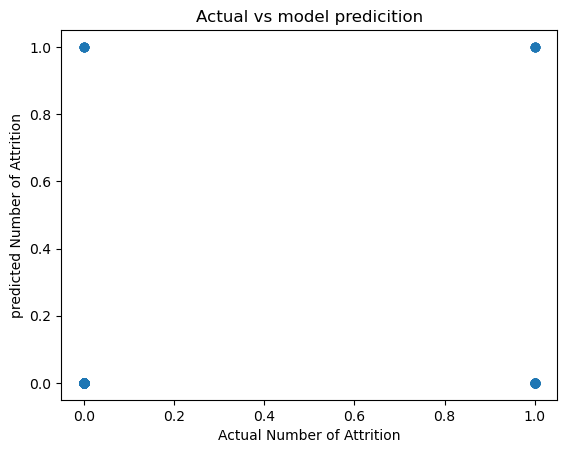

In [26]:
plt.scatter(Y_test,Y_pred)    
plt.xlabel('Actual Number of Attrition')
plt.ylabel('predicted Number of Attrition')
plt.title('Actual vs model predicition')
plt.show( )

Thresholds: [2 1 0]
True positive Rate: [0.         0.10714286 1.        ]
False Positive rate: [0.         0.02681992 1.        ]


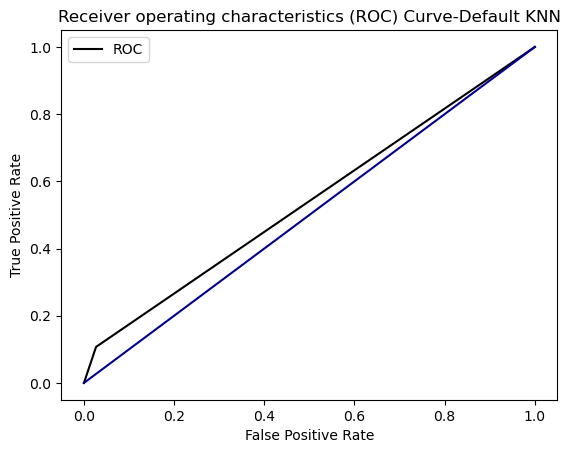

0.5401614668856048


In [53]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)
print('Thresholds:', thresholds)
print('True positive Rate:',tpr)
print('False Positive rate:', fpr)

plt.plot(fpr, tpr, color='black', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='-')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics (ROC) Curve-Default KNN')
plt.legend( )
plt.show(  )
auc_score=roc_auc_score(Y_test,Y_pred)
print(auc_score)


In [28]:
# Selecting optimum parameters through GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid= { 'algorithm': ['kd_tree', 'brute'],
                        'leaf_size' : [3,5,6,7,8],
                         'n_neighbors':[3,5,7,9,11,13]}


In [29]:
gridsearch=GridSearchCV (estimator=Knn, param_grid=param_grid)

In [30]:
gridsearch.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [31]:
gridsearch.best_score_

0.8370239735464315

In [32]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)


In [34]:
Knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [35]:
#Call the function and pass dataset to check train and test scores

metric_score(Knn, X_train,X_test,Y_train,Y_test, train=True)

metric_score(Knn, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 88.64%

==============test Results==============

Accuracy Score: 81.07%


Test Classification Report
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       261
           1       0.42      0.18      0.25        56

    accuracy                           0.81       317
   macro avg       0.63      0.56      0.57       317
weighted avg       0.77      0.81      0.78       317



Thresholds: [2 1 0]
True positive Rate: [0.         0.10714286 1.        ]
False Positive rate: [0.         0.02681992 1.        ]


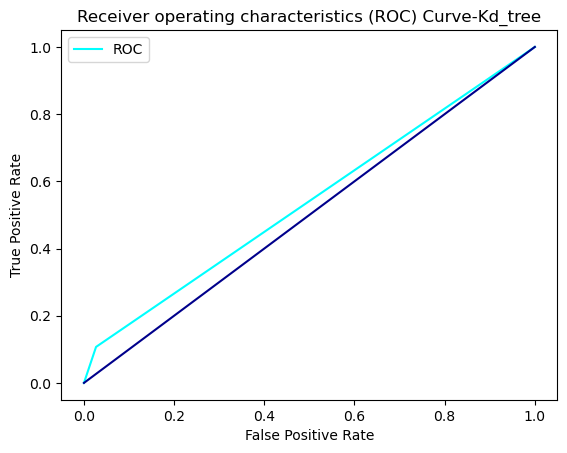

0.5401614668856048


In [54]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)
print('Thresholds:', thresholds)
print('True positive Rate:',tpr)
print('False Positive rate:', fpr)

plt.plot(fpr, tpr, color='cyan', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='-')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics (ROC) Curve-Kd_tree')
plt.legend( )
plt.show(  )
auc_score=roc_auc_score(Y_test,Y_pred)
print(auc_score)

In [37]:
Knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=5)

In [38]:
Knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3)

In [39]:
metric_score(Knn, X_train,X_test,Y_train,Y_test, train=True)

metric_score(Knn, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 86.86%

==============test Results==============

Accuracy Score: 82.02%


Test Classification Report
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       261
           1       0.46      0.11      0.17        56

    accuracy                           0.82       317
   macro avg       0.65      0.54      0.54       317
weighted avg       0.77      0.82      0.77       317



Thresholds: [2 1 0]
True positive Rate: [0.         0.10714286 1.        ]
False Positive rate: [0.         0.02681992 1.        ]


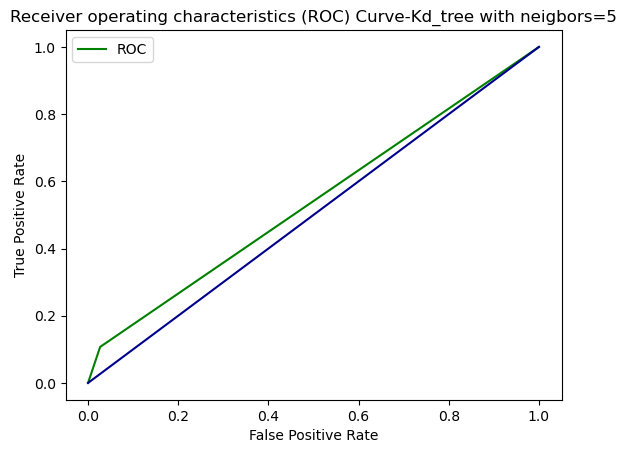

0.5401614668856048


In [55]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)
print('Thresholds:', thresholds)
print('True positive Rate:',tpr)
print('False Positive rate:', fpr)

plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='-')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics (ROC) Curve-Kd_tree with neigbors=5')
plt.legend( )
plt.show(  )
auc_score=roc_auc_score(Y_test,Y_pred)
print(auc_score)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf=DecisionTreeClassifier( )
clf.fit(X_train,Y_train)


DecisionTreeClassifier()

In [43]:
metric_score(clf, X_train,X_test,Y_train,Y_test, train=True)

metric_score(clf, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 100.00%

==============test Results==============

Accuracy Score: 73.50%


Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       261
           1       0.31      0.41      0.35        56

    accuracy                           0.74       317
   macro avg       0.59      0.61      0.59       317
weighted avg       0.77      0.74      0.75       317



Thresholds: [2 1 0]
True positive Rate: [0.         0.10714286 1.        ]
False Positive rate: [0.         0.02681992 1.        ]


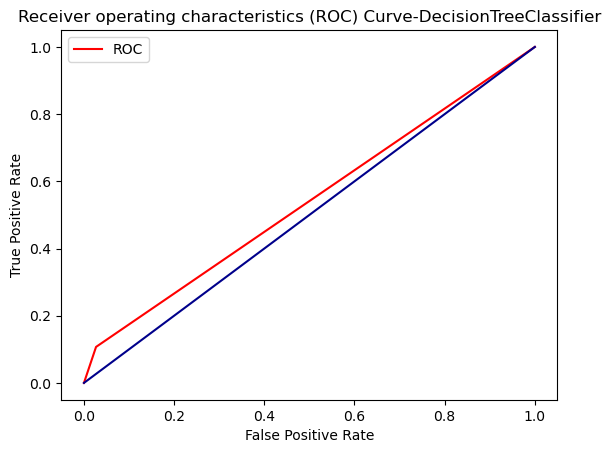

0.5401614668856048


In [56]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)
print('Thresholds:', thresholds)
print('True positive Rate:',tpr)
print('False Positive rate:', fpr)

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='-')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics (ROC) Curve-DecisionTreeClassifier')
plt.legend( )
plt.show(  )
auc_score=roc_auc_score(Y_test,Y_pred)
print(auc_score)

In [45]:
param_grid= { 'criterion': ['gini', 'Entropy'],
                        'max_depth' : range(10,15),
                        'min_samples_leaf':range(10,15),
                        'min_samples_split':range(10,15),
                        'max_leaf_nodes':range(10,15)}

In [46]:
gridsearch=GridSearchCV (estimator=clf, param_grid=param_grid, cv=5,n_jobs=-1)

In [47]:
gridsearch.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(10, 15),
                         'min_samples_leaf': range(10, 15),
                         'min_samples_split': range(10, 15)})

In [48]:
best_parameters=gridsearch.best_params_
print(best_parameters)


{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 11, 'min_samples_split': 10}


In [49]:
clf=DecisionTreeClassifier(criterion='gini', min_samples_split=12,min_samples_leaf=11,max_depth=10, max_leaf_nodes=10)

In [50]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=11,
                       min_samples_split=12)

In [51]:
metric_score(clf, X_train,X_test,Y_train,Y_test, train=True)

metric_score(clf, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 86.75%

==============test Results==============

Accuracy Score: 80.13%


Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       261
           1       0.40      0.25      0.31        56

    accuracy                           0.80       317
   macro avg       0.63      0.58      0.60       317
weighted avg       0.77      0.80      0.78       317



Thresholds: [2 1 0]
True positive Rate: [0.         0.10714286 1.        ]
False Positive rate: [0.         0.02681992 1.        ]


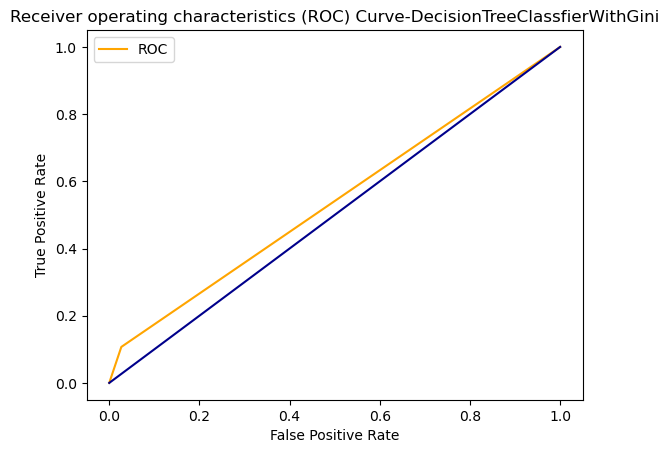

0.5401614668856048


In [57]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)
print('Thresholds:', thresholds)
print('True positive Rate:',tpr)
print('False Positive rate:', fpr)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='-')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics (ROC) Curve-DecisionTreeClassfierWithGini')
plt.legend( )
plt.show(  )
auc_score=roc_auc_score(Y_test,Y_pred)
print(auc_score)


In [ ]:
# Aforementioned in view, it can be deduced that ruc_auc_score of all aforementioned algorithms is almost similar
# However Accuraccy of KNN with improved parameters is 82.02%. Therefore, it could be considered as optimum choice among 
#all algorithm for subject dataset